In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. 交互特征(Interactions)

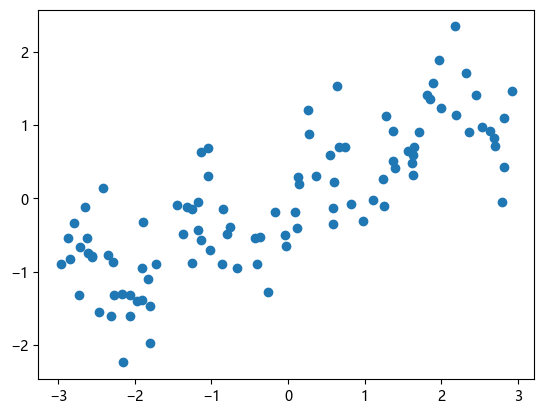

In [3]:
def make_wave(n_samples):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

X, y = make_wave(n_samples=100)

plt.scatter(X, y);

In [4]:
bins = np.linspace(-3, 3, 11)

bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [5]:
which_bin = np.digitize(X, bins=bins, right=False) 
print(X.shape, which_bin.shape)

(100, 1) (100, 1)


In [6]:
np.unique(which_bin)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
np.bincount(which_bin.ravel())

array([ 0, 13, 15,  6, 12,  7, 10,  7, 12,  9,  9])

In [8]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto', sparse_output=False)
encoder.fit(which_bin)


X_binned = encoder.transform(which_bin)


X_combined = np.hstack([X, X_binned])

print('Shape: \n', X_combined.shape)

pd.DataFrame(X_combined, 
             columns=['x'] + list(f"[{bins[i]:.1f}, {bins[i+1]:.1f})" 
                                  for i in range(10))).head()

Shape: 
 (100, 11)


,x,"[-3.0, -2.4)","[-2.4, -1.8)","[-1.8, -1.2)","[-1.2, -0.6)","[-0.6, 0.0)","[0.0, 0.6)","[0.6, 1.2)","[1.2, 1.8)","[1.8, 2.4)","[2.4, 3.0)"
0,-0.752759,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.704286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.391964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.591951,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-2.063888,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<br>

使用sklearn线性回归

In [9]:
from sklearn.linear_model import LinearRegression

lmbin_reg = LinearRegression().fit(X_combined, y)

print(lmbin_reg.coef_)

[-0.26930332 -1.43746997 -1.88531979 -0.83367597 -0.53708445 -0.74256109
  0.30127093  0.584209    0.93891885  2.04130111  1.57041139]


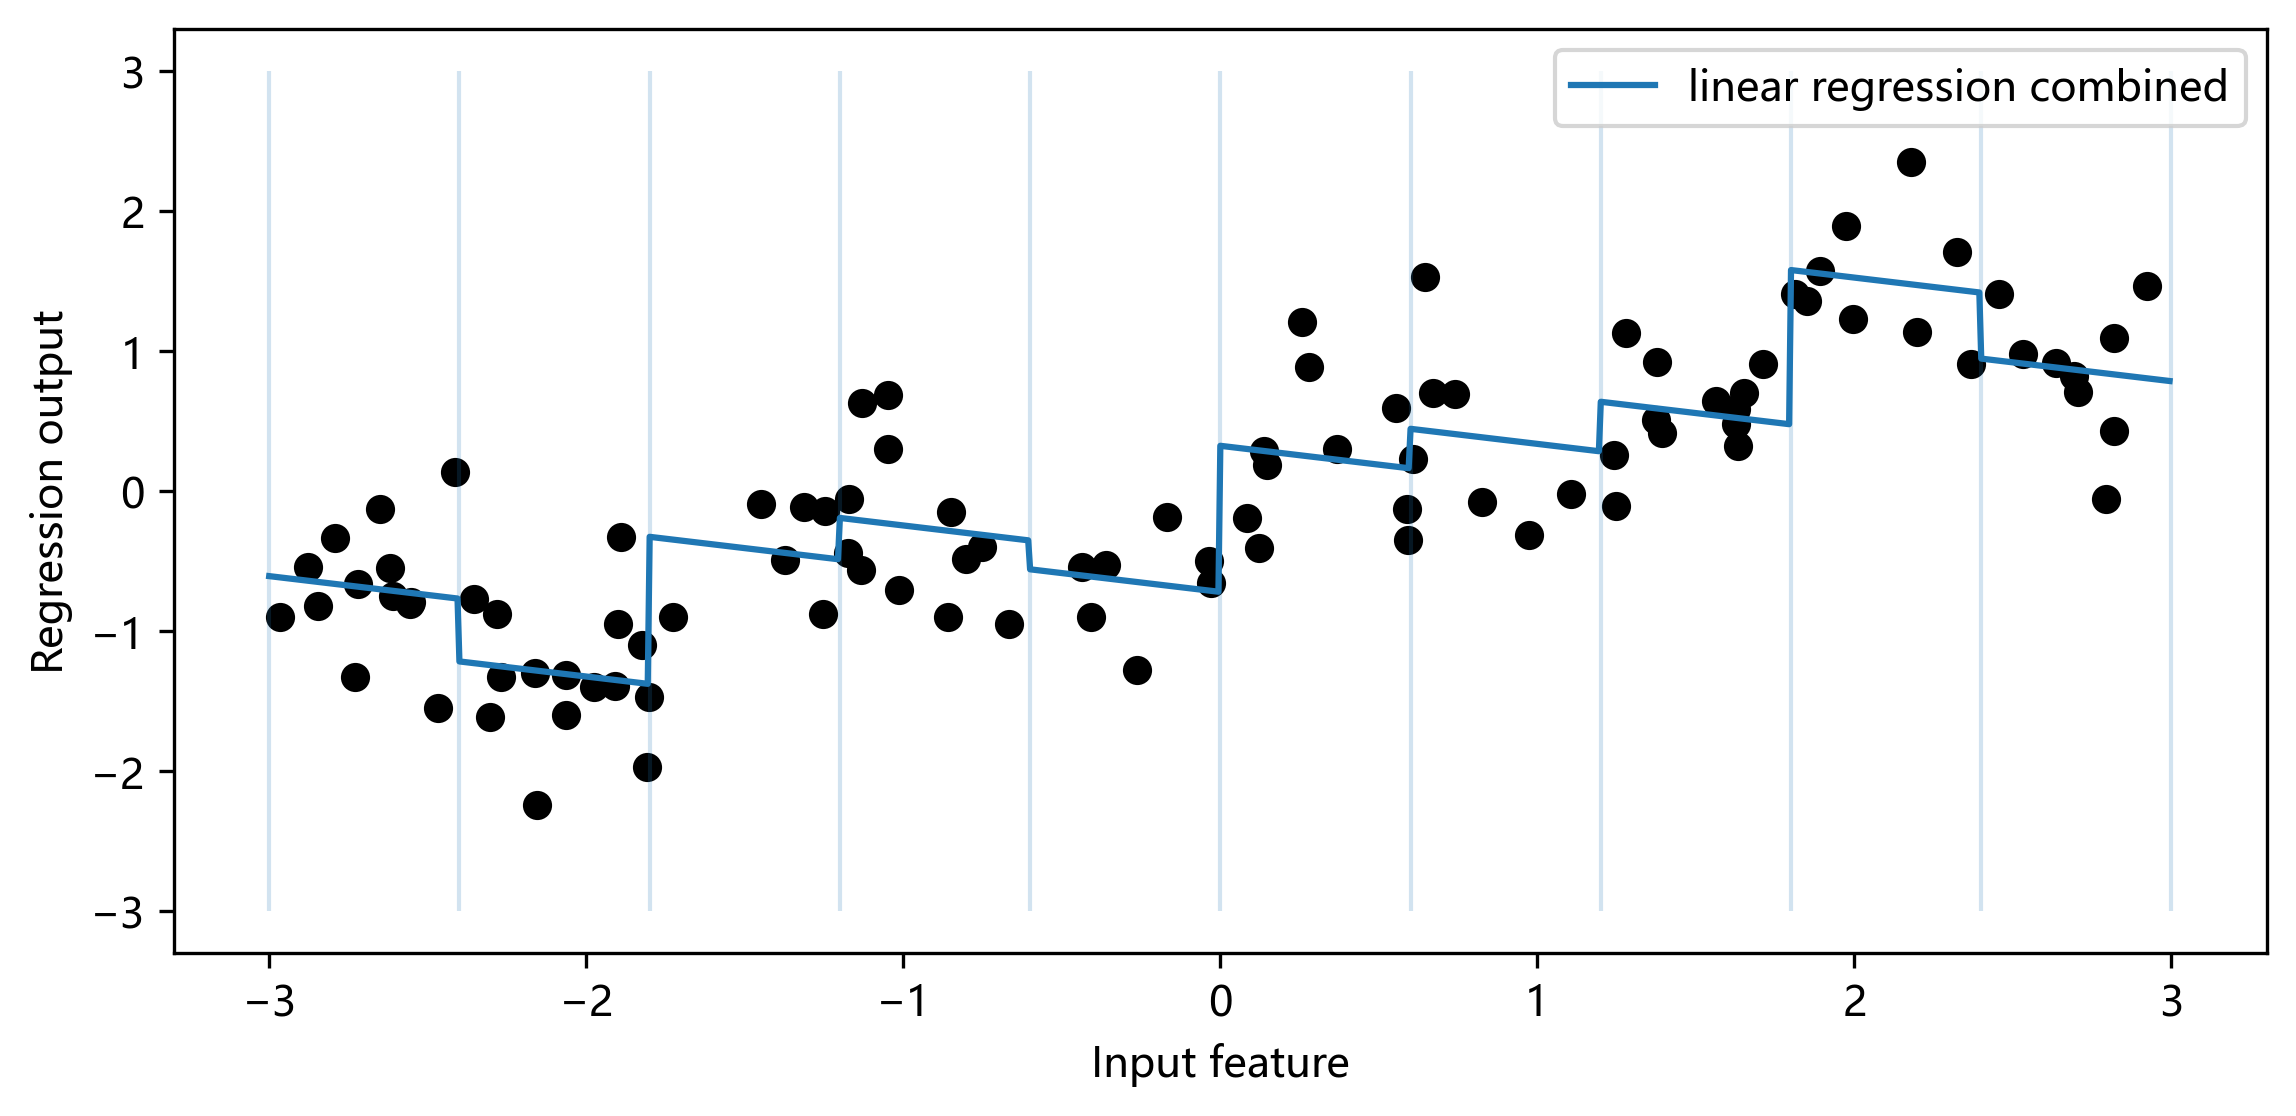

In [10]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_binned = encoder.transform(np.digitize(line, bins=bins, right=False))

line_combined = np.hstack([line, line_binned])


plt.figure(figsize=(9, 4), dpi=300)
plt.scatter(X[:, 0], y, c='black');
plt.plot(line, lmbin_reg.predict(line_combined), label='linear regression combined')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)

plt.legend(loc="best")
plt.ylabel("Regression output"); plt.xlabel("Input feature");

<br>

使用`statsmodels`线性回归

In [19]:
import statsmodels.api as sm

lm_ols = sm.OLS(y, X_combined).fit()
lm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     31.55
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           4.25e-25
Time:                        07:13:51   Log-Likelihood:                -60.396
No. Observations:                 100   AIC:                             142.8
Df Residuals:                      89   BIC:                             171.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2693      0.273     -0.986      0.327      -0.812       0.273
x2            -1.4147      0.743     -1.905      0.060      -2.890       0.061
x3            -1.8625      0.573     -3.251      0.002      -3.001      -0.724
x4            -0.8109      0.426     -1.904      0.060      -1.657       0.035
x5            -0.5143      0.298     -1.727      0.088      -1.106       0.077
x6            -0.7198      0.189     -3.802      0.000      -1.096      -0.344
x7             0.3241      0.171      1.893      0.062      -0.016       0.664
x8             0.6070      0.280      2.165      0.033       0.050       1.164
x9             0.9617      0.425      2.260      0.026       0.116       1.807
x10            2.0641      0.585      3.526      0.001       0.901       3.227
x11            1.5932      0.756      2.108      0.038       0.091       3.095
==============================================================================
Omnibus:                        1.394   Durbin-Watson:                   2.385
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                1.416
Skew:                           0.272   Prob(JB):                        0.493
Kurtosis:                       2.793   Cond. No.                         58.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 线性模型的交互项

$$
y = 
b_1 x_1 + b_2 x_2 + \dots + b_{10} x_{10} +
c_1 x x_1 + c_2 x x_2 + \dots + c_{10} x x_{10}
$$ 

当$x_1=1$，其它$x_i=0$时，上式为 $$y = b_1 + c_1 x$$ 

当$x_2=1$，其它$x_i=0$时，上式为 $$y = b_2 + c_2 x$$ 


<br>

组合带有交互项的特征矩阵

In [14]:
X_product = np.hstack([X, X_binned, X * X_binned])
print(X_product.shape)

(100, 21)


In [16]:
lmbin_reg2 = LinearRegression().fit(X_product, y)

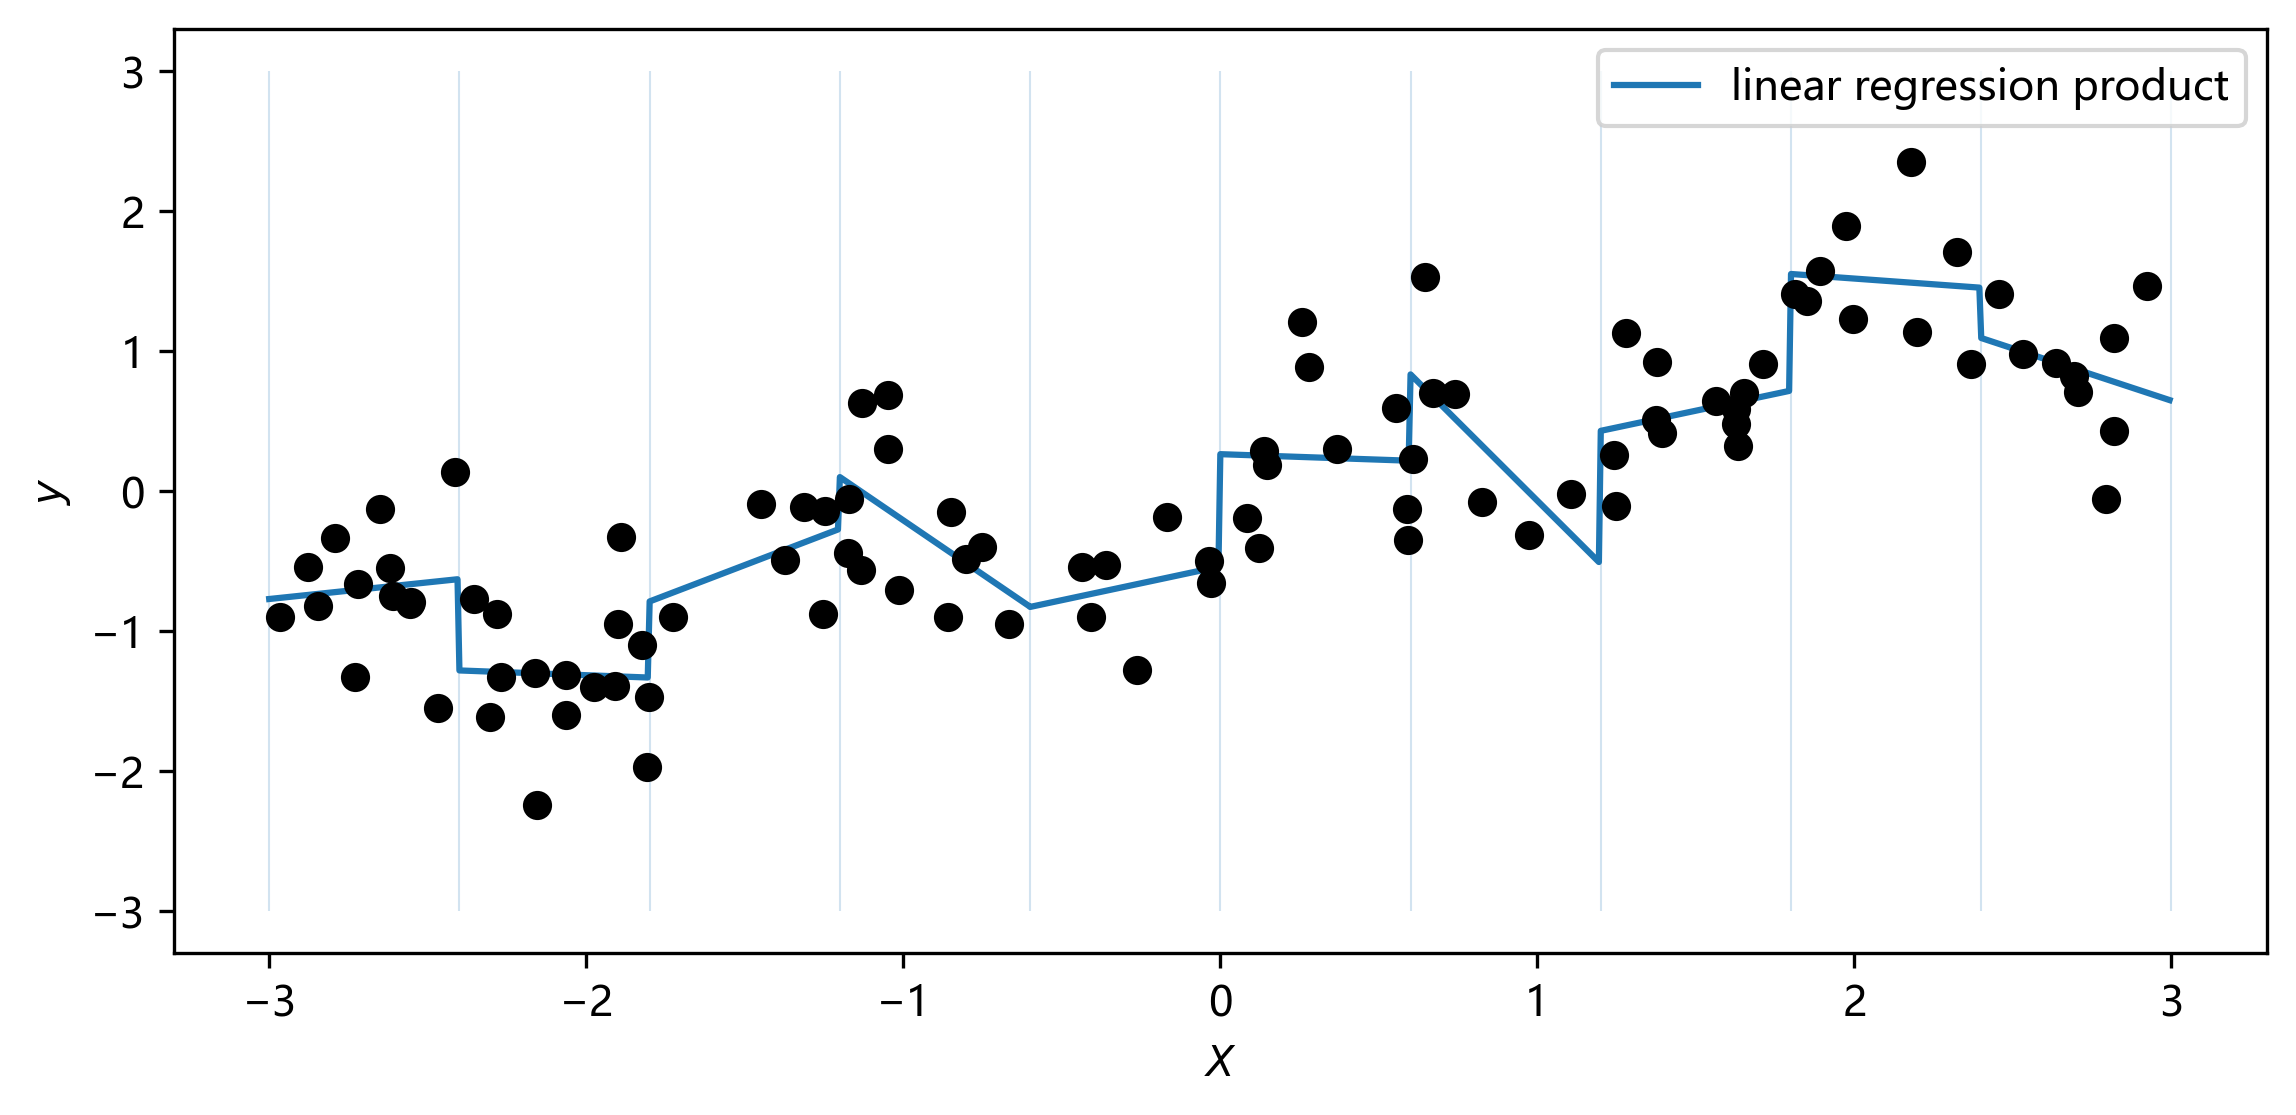

In [17]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_binned = encoder.transform(np.digitize(line, bins=bins, right=False))

line_product = np.hstack([line, line_binned, line * line_binned])

plt.figure(figsize=(9, 4), dpi=300)
plt.plot(line, lmbin_reg2.predict(line_product), label='linear regression product')
plt.vlines(bins, -3, 3, linewidth=0.5, alpha=.2)
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel(r"$y$"); plt.xlabel(r"$X$")
plt.legend(loc="best");

使用`statsmodels`拟合线性模型

In [47]:
import statsmodels.api as sm

lm_ols = sm.OLS(y, X_product).fit()
lm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     17.13
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           9.31e-21
Time:                        01:11:30   Log-Likelihood:                -54.951
No. Observations:                 100   AIC:                             149.9
Df Residuals:                      80   BIC:                             202.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2552      0.266     -0.959      0.341      -0.785       0.275
x2            -0.0574      2.214     -0.026      0.979      -4.464       4.349
x3            -1.4845      1.330     -1.116      0.268      -4.132       1.163
x4             0.7698      1.636      0.470      0.639      -2.487       4.026
x5            -1.7519      0.789     -2.221      0.029      -3.322      -0.182
x6            -0.5373      0.326     -1.646      0.104      -1.187       0.112
x7             0.2643      0.284      0.930      0.355      -0.301       0.830
x8             2.1872      0.840      2.603      0.011       0.515       3.860
x9            -0.1444      1.201     -0.120      0.905      -2.534       2.246
x10            1.8459      1.663      1.110      0.270      -1.463       5.155
x11            2.8850      3.018      0.956      0.342      -3.121       8.891
x12            0.4929      0.793      0.622      0.536      -1.085       2.071
x13            0.1703      0.642      0.265      0.792      -1.107       1.448
x14            1.1205      1.088      1.030      0.306      -1.045       3.286
x15           -1.2885      0.771     -1.671      0.099      -2.823       0.246
x16            0.7380      1.056      0.699      0.487      -1.364       2.840
x17            0.1769      0.750      0.236      0.814      -1.315       1.669
x18           -2.0005      0.971     -2.060      0.043      -3.933      -0.068
x19            0.7347      0.778      0.945      0.348      -0.813       2.282
x20            0.0916      0.772      0.119      0.906      -1.445       1.628
x21           -0.4911      1.041     -0.472      0.639      -2.563       1.581
==============================================================================
Omnibus:                        0.596   Durbin-Watson:                   2.231
Prob(Omnibus):                  0.742   Jarque-Bera (JB):                0.709
Skew:                           0.167   Prob(JB):                        0.702
Kurtosis:                       2.759   Cond. No.                     1.25e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 2. 多项式(Polynomials)

$$ y = b_0 + b_1 x + b_2 x^2 + \dots + b_9 x^9 +b_{10} x^{10}$$

### 2.1 使用PolynomialFeatures构造多项式矩阵

In [19]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)


print("X_poly's shape:", X_poly.shape)

X_poly's shape: (100, 10)


> `include_bias=True`表示需含有常数项

In [69]:
pd.DataFrame(X_poly, columns=poly.get_feature_names()).head()

,x0,x0^2,x0^3,x0^4,x0^5,x0^6,x0^7,x0^8,x0^9,x0^10
0,-0.752759,0.566647,-0.426548,0.321088,-0.241702,0.181944,-0.136960,0.103098,-0.077608,0.058420
1,2.704286,7.313162,19.776880,53.482337,144.631526,391.124988,1057.713767,2860.360362,7735.232021,20918.278410
2,1.391964,1.937563,2.697017,3.754150,5.225640,7.273901,10.125005,14.093639,19.617834,27.307312
3,0.591951,0.350406,0.207423,0.122784,0.072682,0.043024,0.025468,0.015076,0.008924,0.005283
4,-2.063888,4.259634,-8.791409,18.144485,-37.448187,77.288869,-159.515582,329.222321,-679.478050,1402.366700


### 2.2 线性回归拟合

<br>
使用`sklearn`拟合回归模型

In [23]:
ploy_reg = LinearRegression().fit(X_poly, y)

print(ploy_reg.coef_)

[ 1.20149813  0.80054452 -1.40082262 -0.66726081  0.68141161  0.21996432
 -0.11583144 -0.0302944   0.00632324  0.00146654]


In [21]:
ploy_reg.intercept_

np.float64(-0.24505209615429813)

`scikit-learning`的`LinearRegression`包含截距`intercept_`，因此在特征矩阵中无需构造常数项

<br>
预测结果

In [25]:
ploy_pred = ploy_reg.predict(poly.transform(line))

<br>
绘制拟合结果

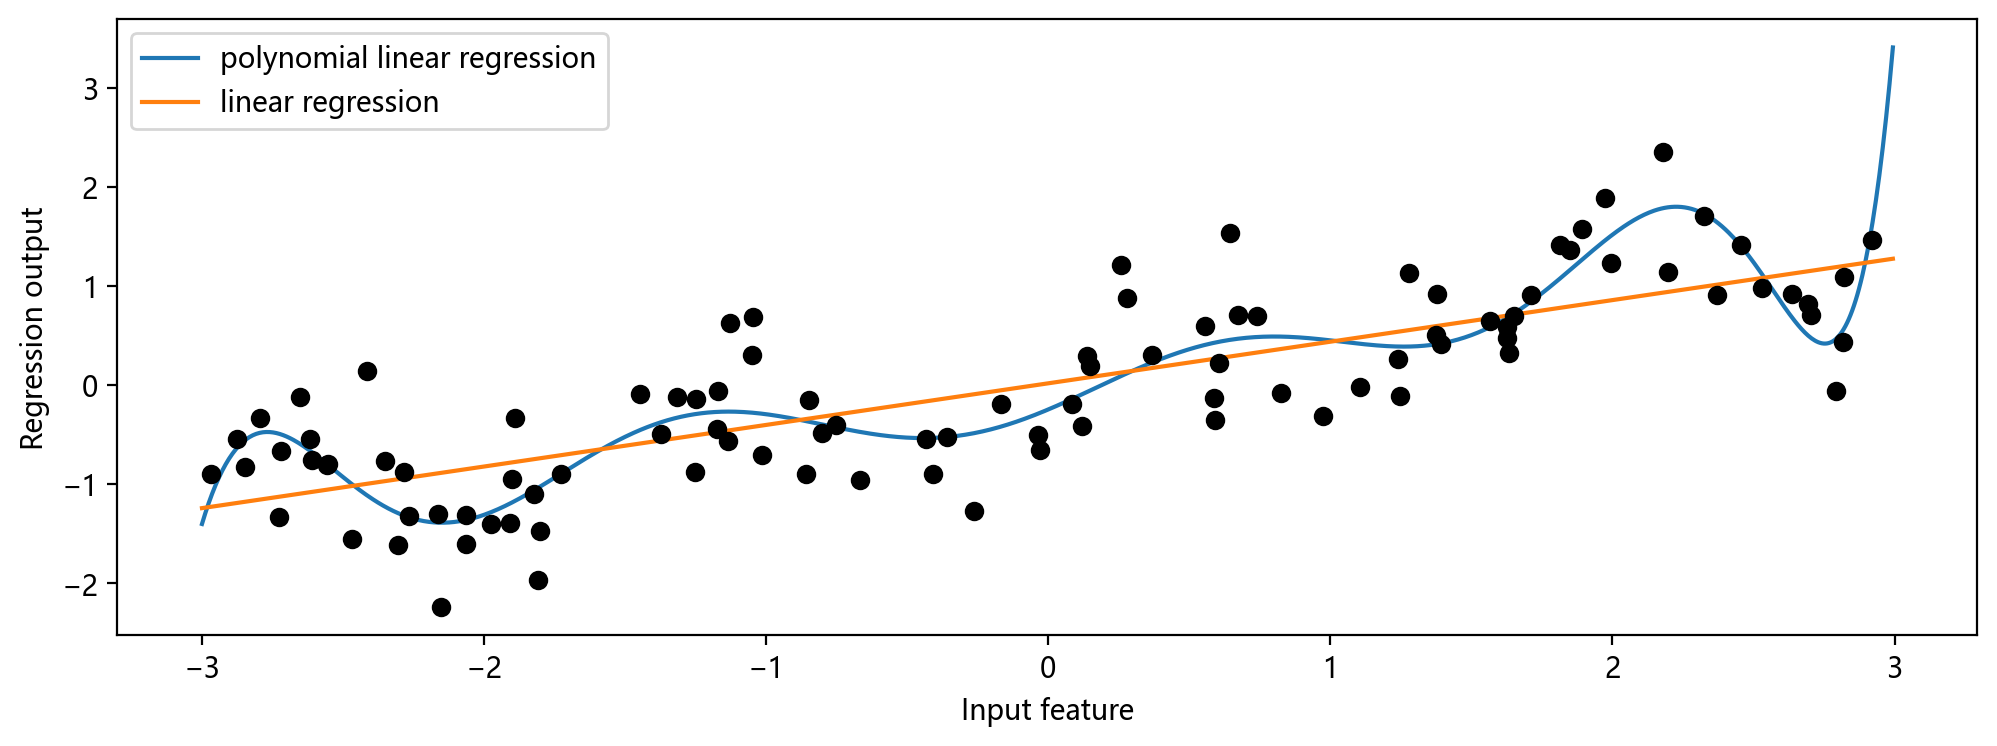

In [26]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
lm_reg = LinearRegression().fit(X, y)

plt.figure(figsize=(12,4), dpi=200)
plt.plot(line, ploy_pred, label='polynomial linear regression')
plt.plot(line, lm_reg.predict(line), label='linear regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output"); plt.xlabel("Input feature")
plt.legend(loc="best");

> 多项式回归在一维数据上的得到了非常平滑的你和，但高次多项式回归在边界或者数据很少的区域可能有极端的表现。

<br>
使用`statsmodels`拟合线性模型

In [27]:
import statsmodels.api as sm

lm_ols = sm.OLS(y, X).fit()
lm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.625
Model:                            OLS   Adj. R-squared (uncentered):              0.621
Method:                 Least Squares   F-statistic:                              164.8
Date:                Fri, 12 Dec 2025   Prob (F-statistic):                    8.53e-23
Time:                        16:56:08   Log-Likelihood:                         -87.262
No. Observations:                 100   AIC:                                      176.5
Df Residuals:                      99   BIC:                                      179.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4186      0.033     12.839      0.000       0.354       0.483
==============================================================================
Omnibus:                        0.547   Durbin-Watson:                   2.370
Prob(Omnibus):                  0.761   Jarque-Bera (JB):                0.685
Skew:                           0.148   Prob(JB):                        0.710
Kurtosis:                       2.722   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
lm_ols = sm.OLS(y, X_poly).fit()
lm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.767
Model:                            OLS   Adj. R-squared (uncentered):              0.741
Method:                 Least Squares   F-statistic:                              29.59
Date:                Fri, 12 Dec 2025   Prob (F-statistic):                    2.66e-24
Time:                        16:56:13   Log-Likelihood:                         -63.482
No. Observations:                 100   AIC:                                      147.0
Df Residuals:                      90   BIC:                                      173.0
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1313      0.273      4.150      0.000       0.590       1.673
x2             0.2299      0.293      0.784      0.435      -0.353       0.813
x3            -1.3287      0.345     -3.847      0.000      -2.015      -0.643
x4            -0.2895      0.296     -0.979      0.330      -0.877       0.298
x5             0.6567      0.139      4.730      0.000       0.381       0.933
x6             0.1175      0.101      1.162      0.248      -0.083       0.319
x7            -0.1124      0.022     -5.195      0.000      -0.155      -0.069
x8            -0.0181      0.014     -1.291      0.200      -0.046       0.010
x9             0.0062      0.001      5.375      0.000       0.004       0.008
x10            0.0009      0.001      1.382      0.170      -0.000       0.002
==============================================================================
Omnibus:                        2.169   Durbin-Watson:                   2.354
Prob(Omnibus):                  0.338   Jarque-Bera (JB):                1.722
Skew:                           0.313   Prob(JB):                        0.423
Kurtosis:                       3.144   Cond. No.                     1.16e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3 支持向量机回归模型(SVR)

支持向量机也可以应用于回归。SVR回归与SVM分类区别在于，SVR的样本点最终只有一类，所寻求的最优超平面不是像SVM那样使两类尽可能分开，而是使所有的样本点离着超平面的总偏差最小。
<center>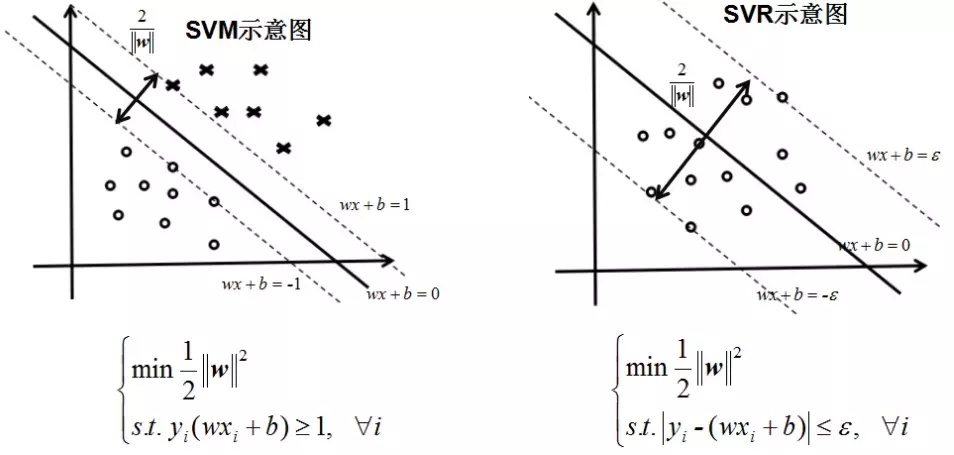</IMG></center>
<br>
带松弛变量
<center>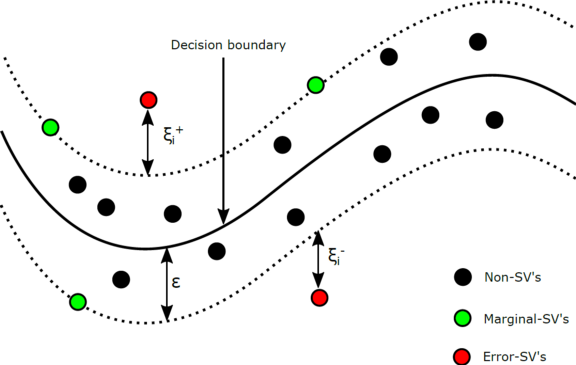</IMG></center>

SVR支持向量回归模型
$$
 y\left(\mathbf {x} \right)=\sum _{i=1}^{N}w_{i}\,\phi \left(\left\|\mathbf {x} -\mathbf {x} _{i}\right\|\right)
$$


求解上面模型，给定训练数据的自变量$\mathbf{x}_i \in \mathbb{R}^p$，$i=1\dots n$和因变量$\mathbf{y} \in \mathbb{R}^n$，转化为优化问题:
$$
\begin{align}\begin{aligned}\min_ {w, b, \zeta, \zeta^*} \frac{1}{2} w^T w + C \sum_{i=1}^{n} (\zeta_i + \zeta_i^*)\\\begin{split}\textrm {subject to } & y_i - w^T \phi (\mathbf{x}_i) - b \leq \varepsilon + \zeta_i,\\
                      & w^T \phi (\mathbf{x}_i) + b - y_i \leq \varepsilon + \zeta_i^*,\\
                      & \zeta_i, \zeta_i^* \geq 0, i=1, ..., n\end{split}\end{aligned}\end{align}
$$



RBF核函数(Radial basis function kernel), $ \gamma ={\tfrac {1}{2\sigma ^{2}} } $
$$
K(\mathbf {x} ,\mathbf {x'} )
=\exp \left(-\gamma \|\mathbf {x} -\mathbf {x'} \|^{2} \right)
=\exp \left(-{\frac {\|\mathbf {x} -\mathbf {x'} \|^{2}}{2\sigma ^{2}}}\right)
$$

In [29]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

svr = SVR(gamma=1, C=1)
svr.fit(X, y)

print("R-squared: ", r2_score(y, svr.predict(X)))

R-squared:  0.7578552032580654


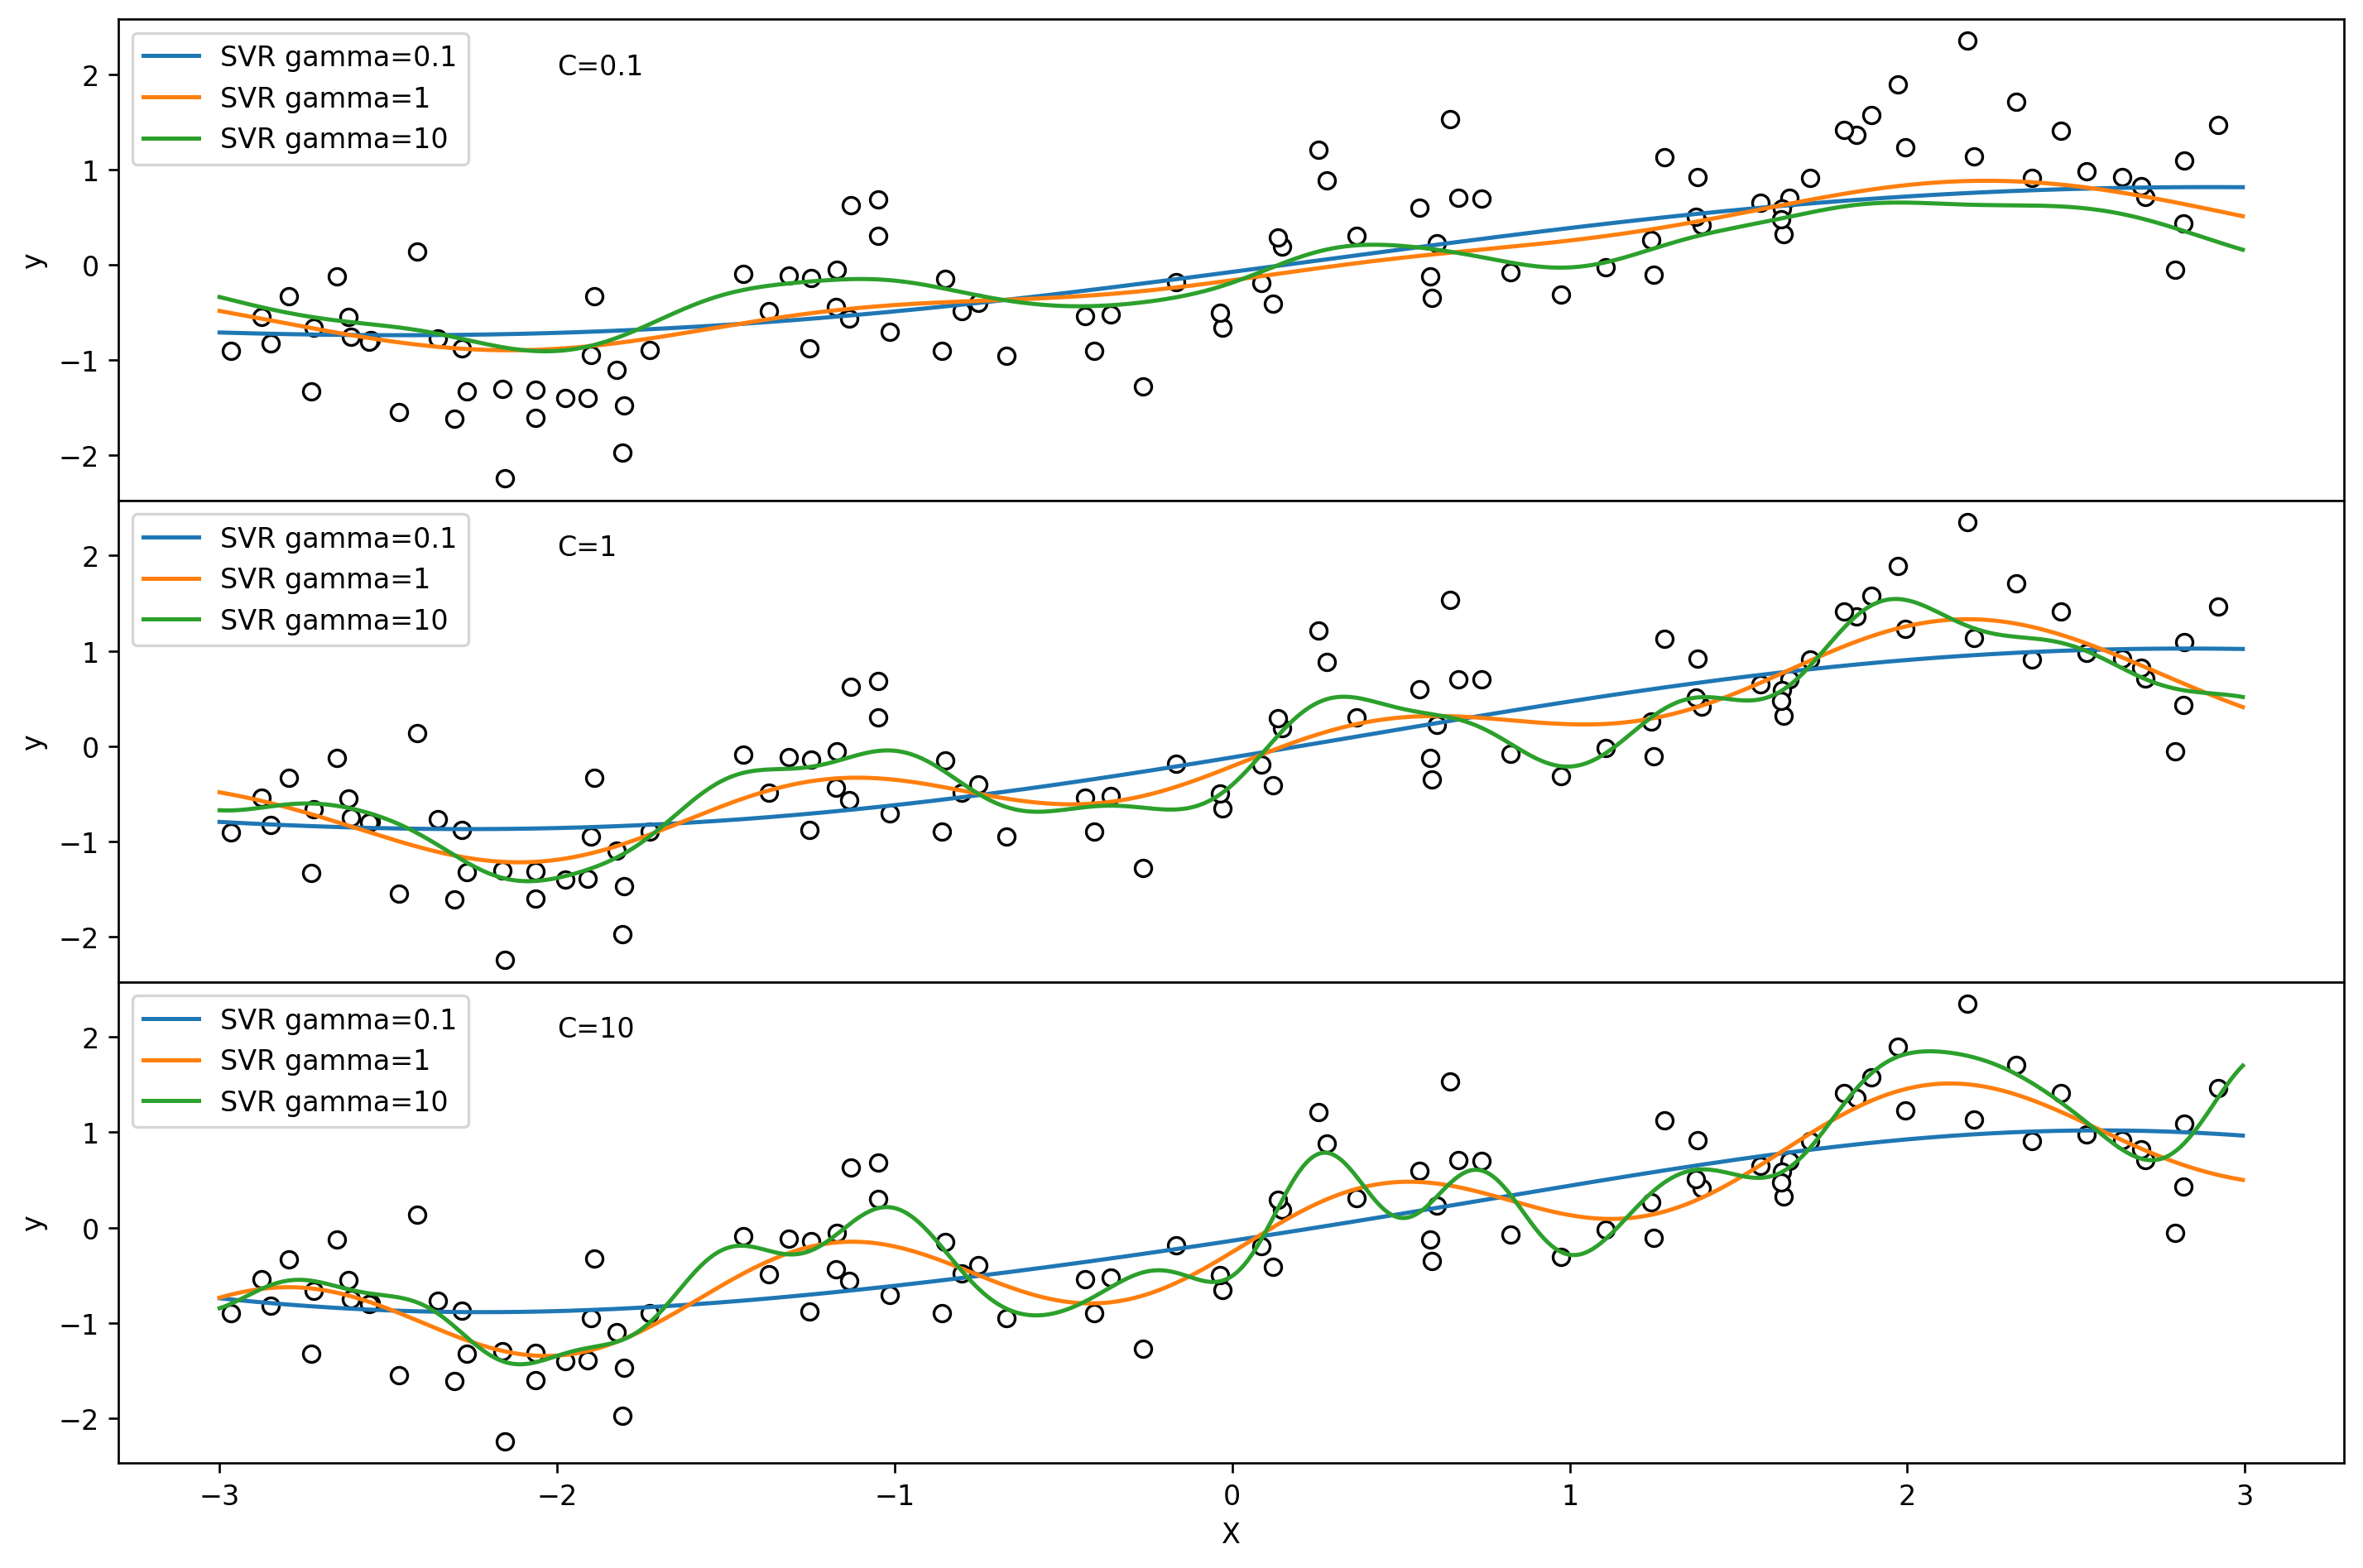

In [66]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)


gamma_opts = [0.1, 1, 10]
C_opts = [0.1, 1, 10]

fig, axes = plt.subplots(3, 1, figsize=(12,8), dpi=240, 
                         gridspec_kw={"hspace": 0},
                         sharex=True, sharey=True)
ax = axes[0]

for i in range(len(C_opts)):
    ax = axes[i]
    C = C_opts[i]
    
    max_train = 1.5

    for gamma in [0.1, 1, 10]:
        svr = SVR(gamma=gamma, C=C)
        svr.fit(X, y)
        ax.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
    ax.scatter(X[:, 0], y, c='w', ec="k")
    ax.set_ylabel("y"); ax.set_xlabel("X")
    ax.text(-2, 2, f"C={C}")
    ax.legend(loc="best");
    ax.label_outer()



plt.tight_layout()

注意上图，当`gamma`或`C`取值越高，曲线的泛化能力越差，越容易收到局部点分布影响，对趋势复杂变化学习能力越强。

<br>
设置未来时点不同，按照时间序列进行预测，实质是一种数据“外插(extrapolate)”，是预测训练数据之外的发生，外插要复杂多，不像内插周边有数据点影响，外插完全依赖于训练得到的模型的趋势。如下图，比较明显的`gamma=1`的两条取消，在当前`x=1`曲线是向下趋势，而当前`x=1.5`曲线是上升趋势，表现出完全不同的两周走势，也就数这里的预测极其依赖于当前点的位置。

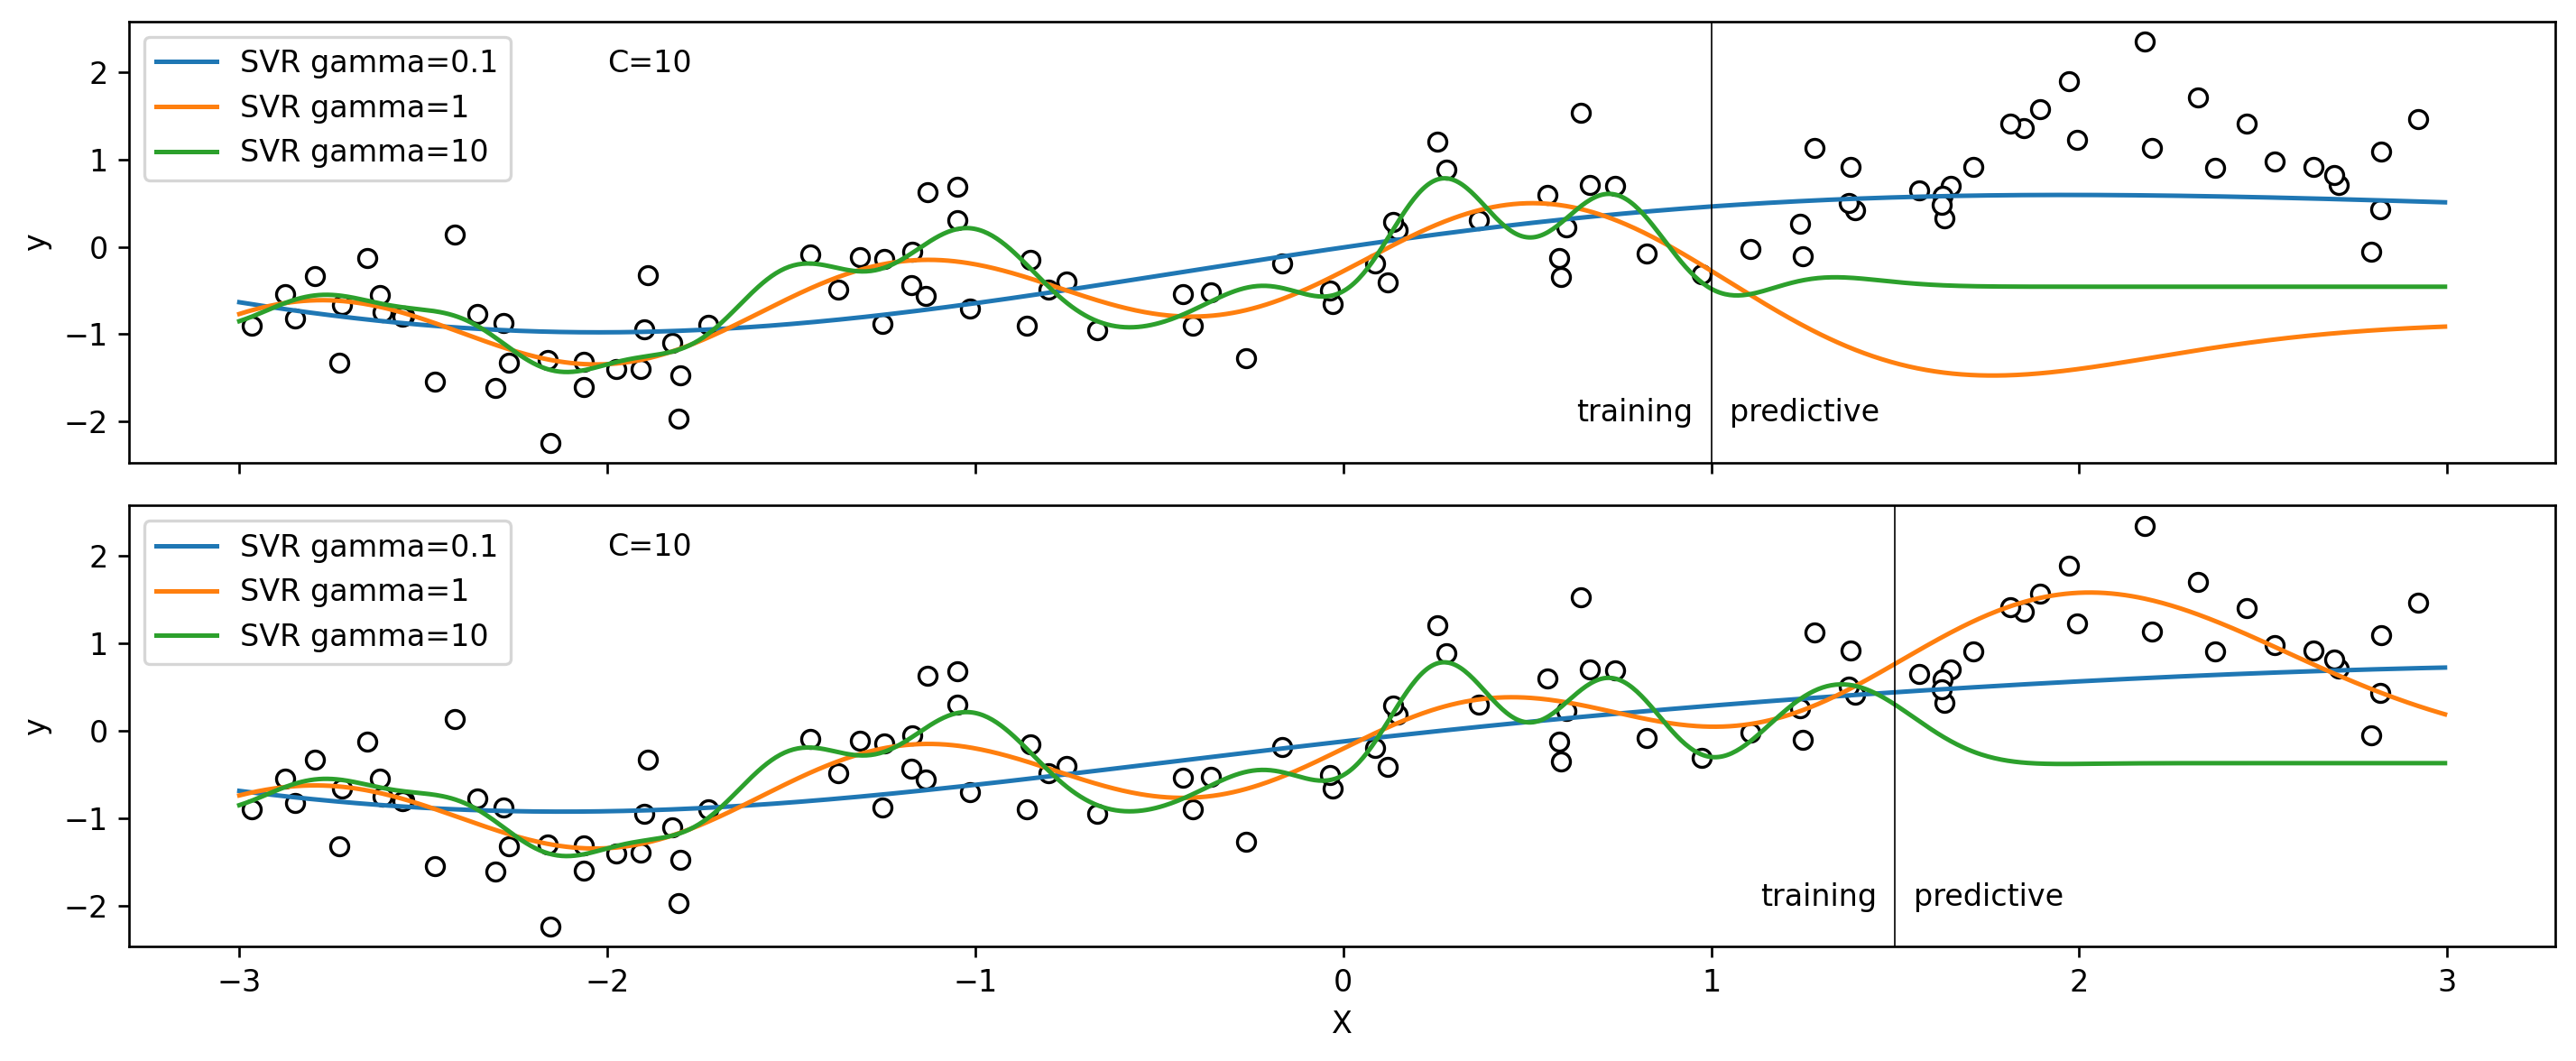

In [61]:

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

max_train_opts = [1, 1.5]
gamma_opts = [0.1, 1, 10]

fig, axes = plt.subplots(2, 1, figsize=(12,5), dpi=240, sharex=True, sharey=True)
ax = axes[0]

for i in range(len(max_train_opts)):
    ax = axes[i]
    max_train = max_train_opts[i]
    
    for gamma in [0.1, 1, 10]:
        svr = SVR(gamma=gamma, C=10)
        train_selected = (X < max_train).ravel()
        svr.fit(X[train_selected,:], y[train_selected])
        ax.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
    ax.scatter(X[:, 0], y, c='w', ec="k")
    ax.axvline(max_train, c="k", ls="-", lw=0.5)
    ax.set_ylabel("y"); ax.set_xlabel("X")
    ax.text(-2, 2, f"C={10}")
    ax.text(max_train - 0.05, -2, "training", ha="right")
    ax.text(max_train + 0.05, -2, "predictive", ha="left")
    ax.legend(loc="best");
    ax.label_outer()



plt.tight_layout()